In [133]:
pip install pandas numpy scikit-learn

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from missingno import matrix


#1.Data Types


In [116]:
# Load the dataset
df = pd.read_csv('cardekho_data.csv')

# Display data types of each column
print(df.dtypes)


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


# 2.Missing Value

In [117]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


#3.Likely Distributions of Numeric Variables

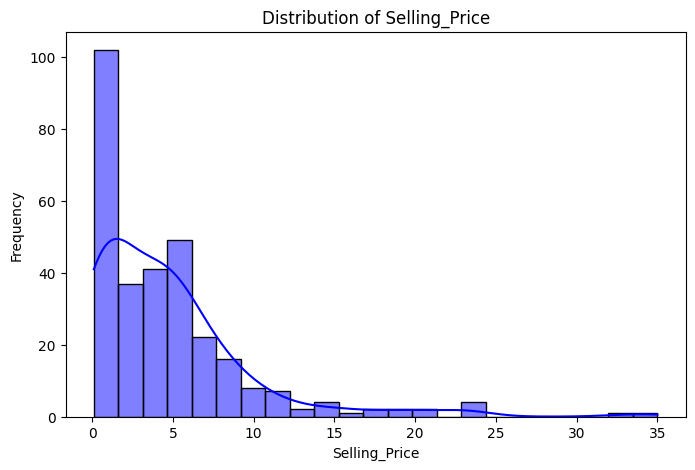

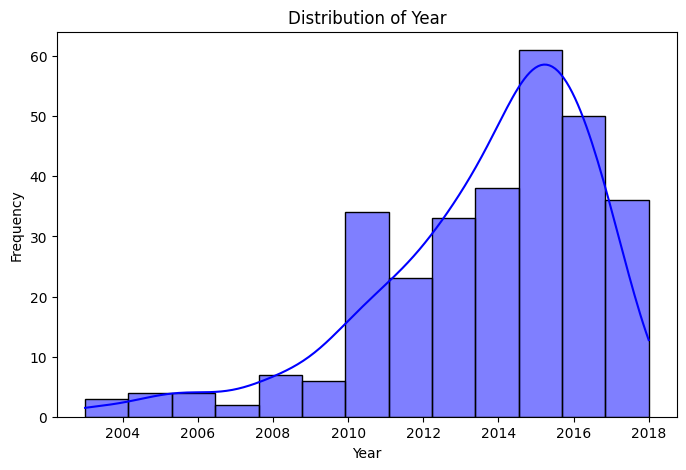

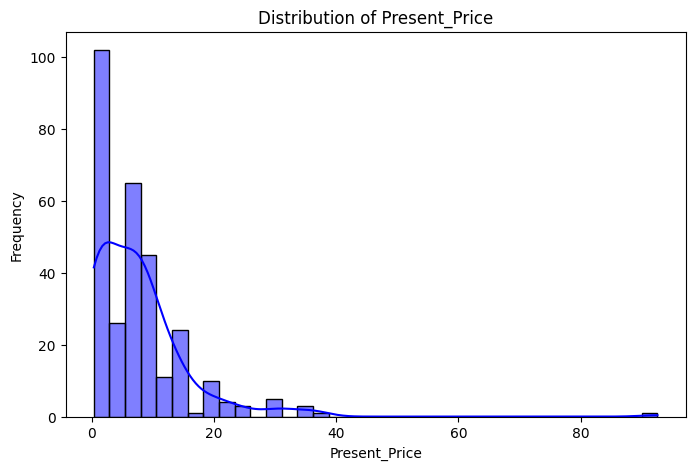

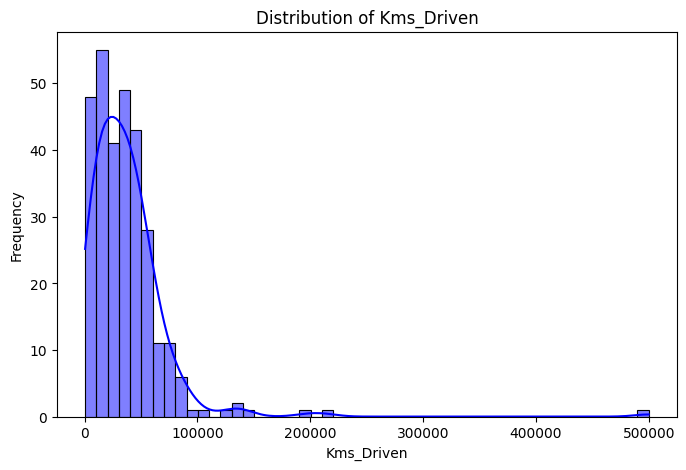

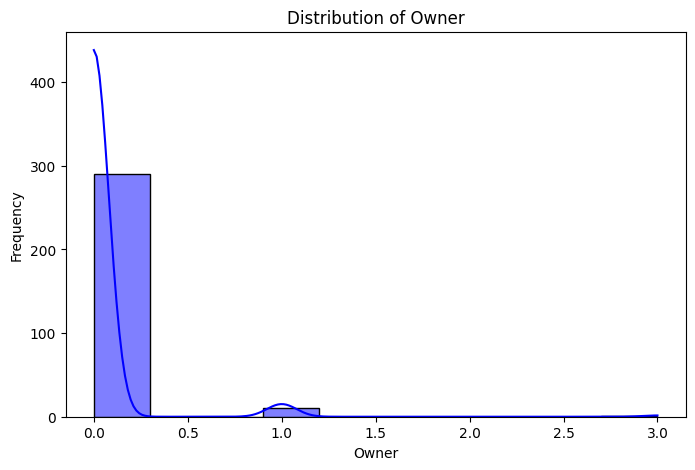

In [118]:
# Visualize the distributions of numeric variables
numeric_variables = ['Selling_Price', 'Year', 'Present_Price', 'Kms_Driven','Owner']  # Add other numeric variable names

for variable in numeric_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[variable], kde=True, color='blue')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()


The X-axis shows the range of values for the variable, and the Y-axis represents the frequency or density of those values.
These plots can help identify patterns, skewness, outliers, and the overall distribution of each numeric variable in the dataset.

#4.Useful Independent Variables

In [119]:
# Assuming 'Target_Variable' is the Selling_Price
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [120]:
# Method 1: RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)


# Method 2: Recursive Feature Elimination (RFE) with RandomForestRegressor
rfe_model = RFE(estimator=RandomForestRegressor(), n_features_to_select=1)
rfe_model.fit(X_train, y_train)
feature_ranking_rfe = pd.Series(rfe_model.ranking_, index=X_encoded.columns)

# Method 3: Feature Importance from Extra Trees Regressor
et_model = ExtraTreesRegressor()
et_model.fit(X_train, y_train)
feature_importance_et = pd.Series(et_model.feature_importances_, index=X_encoded.columns)

In [121]:
# Display results
print("Method 1: RandomForestRegressor Feature Importance")
print(feature_importance_rf)

print("\nMethod 2: Recursive Feature Elimination (RFE) Ranking")
print(feature_ranking_rfe)

print("\nMethod 3: Extra Trees Regressor Feature Importance")
print(feature_importance_et)

Method 1: RandomForestRegressor Feature Importance
Year                      5.903465e-02
Present_Price             8.699556e-01
Kms_Driven                3.326858e-02
Owner                     7.439584e-04
Car_Name_Activa 3g        6.400997e-08
                              ...     
Car_Name_xcent            1.098409e-05
Fuel_Type_Diesel          3.163567e-03
Fuel_Type_Petrol          5.009330e-03
Seller_Type_Individual    2.906315e-03
Transmission_Manual       6.416471e-03
Length: 105, dtype: float64

Method 2: Recursive Feature Elimination (RFE) Ranking
Year                       2
Present_Price              1
Kms_Driven                 3
Owner                     17
Car_Name_Activa 3g        80
                          ..
Car_Name_xcent            36
Fuel_Type_Diesel          12
Fuel_Type_Petrol          11
Seller_Type_Individual     9
Transmission_Manual        4
Length: 105, dtype: int64

Method 3: Extra Trees Regressor Feature Importance
Year                      5.718586e-02
P

The provided code aims to assess feature importance for predicting 'Selling_Price' using three methods: RandomForestRegressor, Recursive Feature Elimination (RFE) with RandomForestRegressor, and Extra Trees Regressor. Features are encoded, and the data is split into training and testing sets. The outputs include feature importance scores for each method, aiding in identifying significant predictors for the regression task. This analysis helps guide feature selection for building an effective 'Selling_Price' prediction model.

#5.Independent Variables with Missing Data

In [122]:
# Display the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


This output indicates that there are no missing values in any column of the DataFrame.

#6.Same Data in Training and Test Sets

In [123]:
# Check if the training and test sets have the same data
print(X_train.equals(X_test))


False


A False result indicates that the training set and test set do not have the same data.

#7.Independence of Predictor Variables

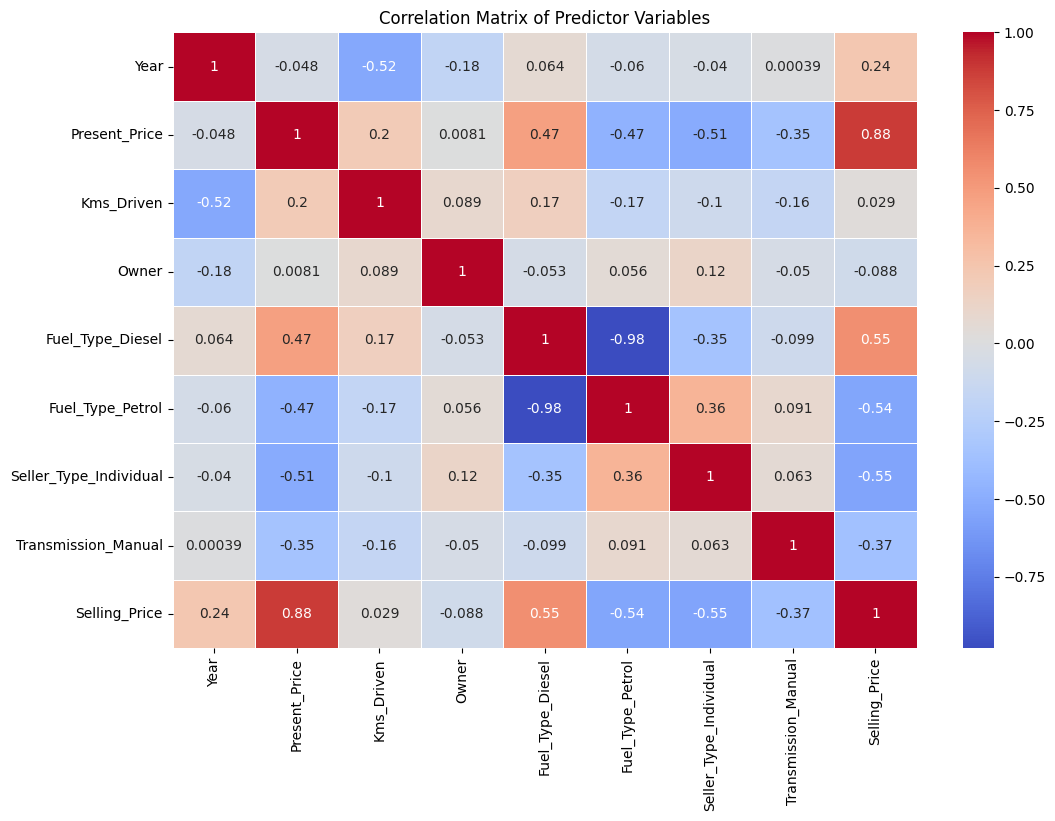

In [124]:
# Selecting only the predictor variables
predictor_variables = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# Convert categorical variables to numerical using one-hot encoding
predictor_variables = pd.get_dummies(predictor_variables, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Adding the target variable for correlation analysis
predictor_variables['Selling_Price'] = df['Selling_Price']

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


Correlation analysis helps identify potential relationships between predictor variables and the target variable.

#8.Most Important Predictor Variables

In [125]:
# Assuming 'Selling_Price' is the target variable
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Use RandomForestRegressor to identify important features
rf_model = RandomForestRegressor()
rf_model.fit(X_encoded, y)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

# Sort and display the most important predictor variables
most_important_variables = feature_importance.sort_values(ascending=False)
print("Most Important Predictor Variables:")
print(most_important_variables)

Most Important Predictor Variables:
Present_Price                   8.732825e-01
Year                            8.108282e-02
Kms_Driven                      2.149509e-02
Car_Name_land cruiser           5.080713e-03
Car_Name_city                   3.583503e-03
                                    ...     
Car_Name_Hero Hunk              1.550021e-08
Car_Name_TVS Wego               1.003191e-08
Car_Name_TVS Sport              6.814990e-09
Car_Name_Bajaj Pulsar 135 LS    5.608064e-09
Car_Name_Hero Glamour           3.716077e-09
Length: 105, dtype: float64


'Present_Price' is the most influential predictor for predicting 'Selling_Price,' followed by 'Year' and 'Kms_Driven.' Other variables also contribute, providing insights into feature importance for the regression model. The outcome helps prioritize variables for further analysis and potential feature selection in predicting car selling prices.

#9.Ranges of Predictor Variables

In [126]:
# Display the ranges of predictor variables
ranges = df.describe().loc[['min', 'max']]
print(ranges)


       Year  Selling_Price  Present_Price  Kms_Driven  Owner
min  2003.0            0.1           0.32       500.0    0.0
max  2018.0           35.0          92.60    500000.0    3.0


1.  For the 'Year' variable, the data spans from the year 2003 to 2018.
2.  'Selling_Price' ranges from a minimum of 0.1 to a maximum of 35.0.
3.  'Present_Price' varies from 0.32 to 92.60.
4.  'Kms_Driven' has a range from 500.0 to 500000.0.
5.  'Owner' has a minimum of 0.0 and a maximum of 3.0.
  
  This summary provides a quick understanding of the spread and scale of each variable.





#10.Distributions of Predictor Variables

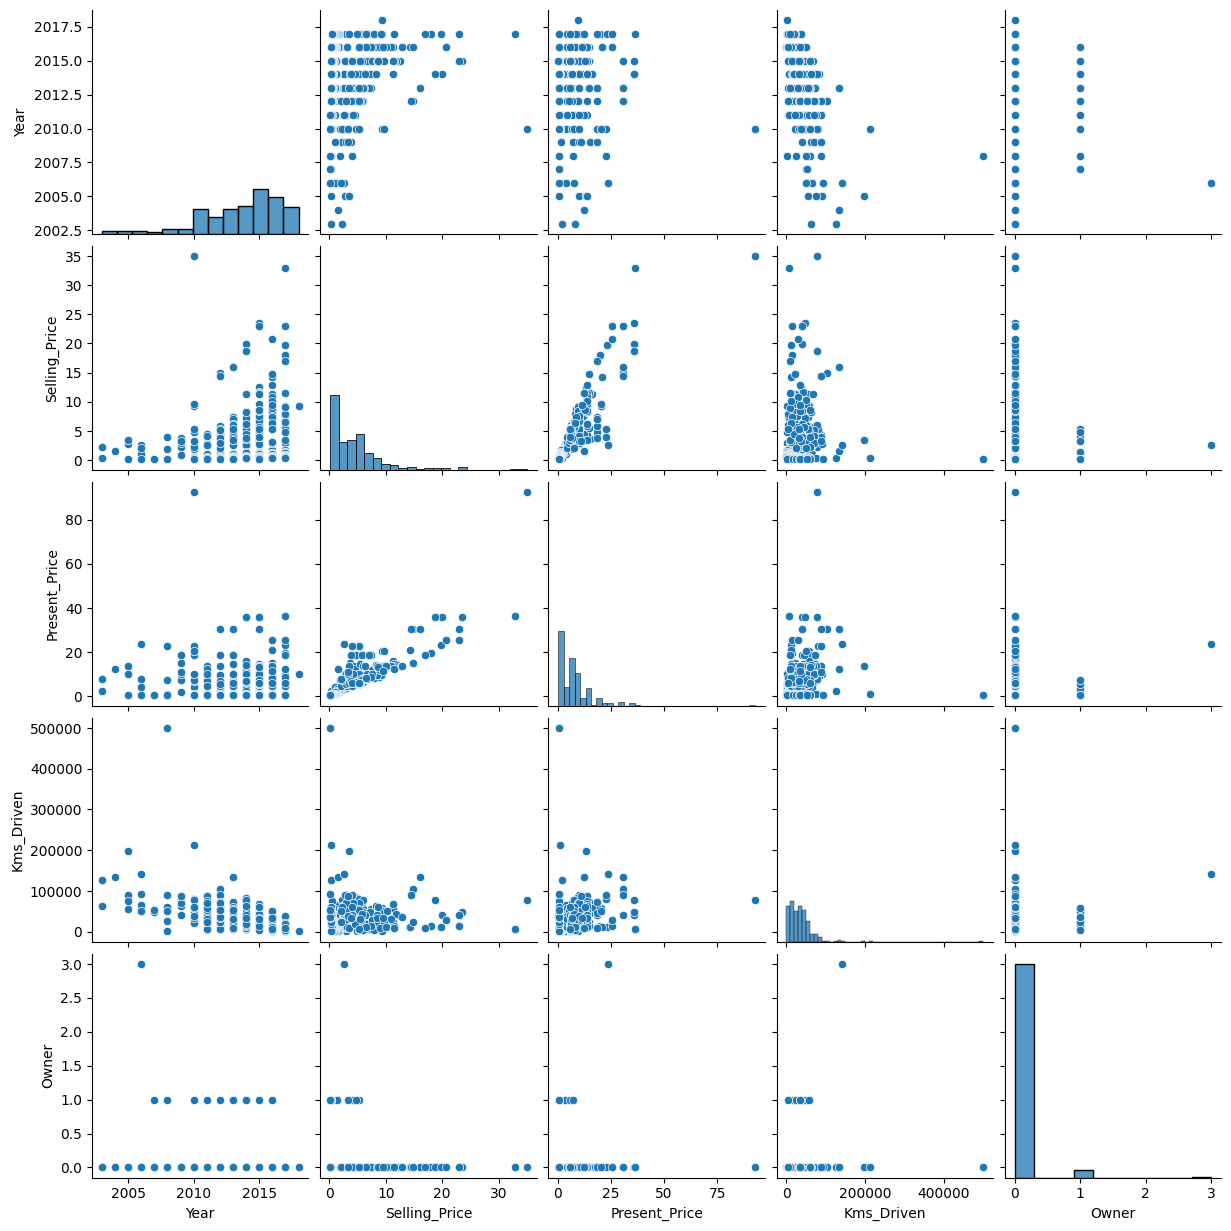

In [127]:
# Visualize the distributions of predictor variables
sns.pairplot(df)
plt.show()


#11.Remove Outliers

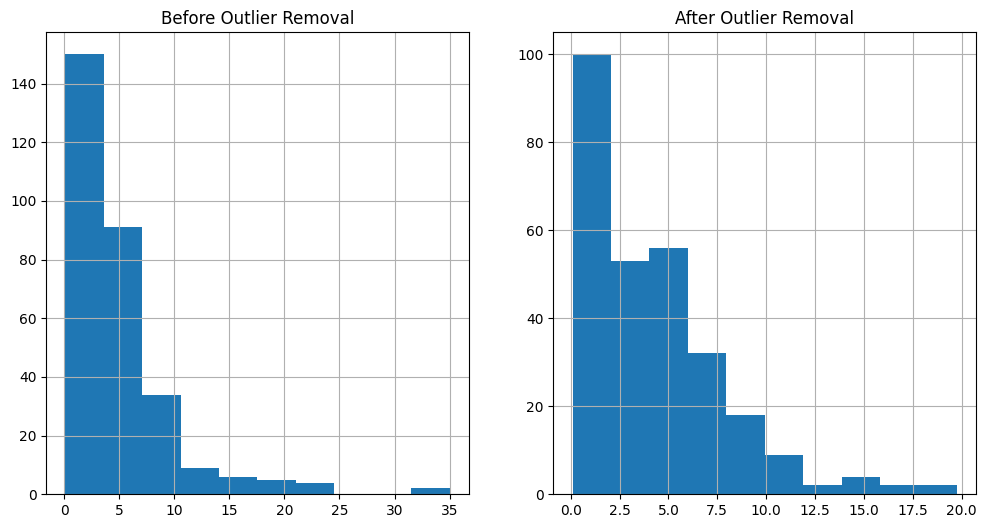

In [128]:
# Assuming 'Selling_Price' is the target variable
target_variable = 'Selling_Price'

# Select numerical columns (excluding the target variable) for z-scoring
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores
z_scores = zscore(df[numeric_columns])

# Define the z-score threshold
z_score_threshold = 3

# Identify rows without outliers based on z-scores
no_outliers_mask = (z_scores < z_score_threshold).all(axis=1)

# Create a DataFrame without outliers
df_no_outliers = df[no_outliers_mask]

# Visualize the impact of outlier removal (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Before Outlier Removal')
df[target_variable].hist()

plt.subplot(1, 2, 2)
plt.title('After Outlier Removal')
df_no_outliers[target_variable].hist()

plt.show()


Removing outliers can impact the final predictive model in various ways. It can improve model performance by mitigating the influence of extreme values, leading to a more robust and generalizable model. However, the impact depends on factors such as model sensitivity, data distribution, and domain knowledge. Carefully assess the effects by comparing model performance with and without outlier removal, considering metrics like mean squared error or R-squared. Experimentation and validation through techniques like cross-validation are recommended for a reliable assessment.

#12.Randomly Remove Data and Impute

In [149]:
# Display data types of each column
print(df.dtypes)

# Randomly remove 1%, 5%, and 10% of the data
np.random.seed(42)  # Set seed for reproducibility
missing_percentages = [0.01, 0.05, 0.10]

for percentage in missing_percentages:
    # Copy the original data to avoid modifying the original dataset
    df_missing = df.copy()

    # Randomly choose indices to remove based on the specified percentage
    num_rows = df_missing.shape[0]
    num_rows_to_remove = int(percentage * num_rows)
    indices_to_remove = np.random.choice(num_rows, num_rows_to_remove, replace=False)

    # Set values at randomly chosen indices to NaN
    df_missing.iloc[indices_to_remove, :] = np.nan

    # Separate numeric and categorical columns
    numeric_cols = df_missing.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_missing.select_dtypes(include=['object']).columns

    # Impute missing values for numeric data using three methods
    for method in ['mean', 'iterative', 'knn']:
        imputer_numeric = None
        if method == 'mean':
            imputer_numeric = SimpleImputer(strategy='mean')
        elif method == 'iterative':
            imputer_numeric = IterativeImputer()
        elif method == 'knn':
            imputer_numeric = KNNImputer()

        df_missing[numeric_cols] = imputer_numeric.fit_transform(df_missing[numeric_cols])

        # Evaluate the performance of imputation for numeric data
        residuals_numeric = np.abs(df_missing[numeric_cols] - df[numeric_cols])
        percentage_error_numeric = (residuals_numeric / df[numeric_cols]).mean().mean() * 100
        print(f"Imputation Method: {method}, Missing Percentage: {percentage * 100}%")
        print(f"Numeric Data Percentage Error: {percentage_error_numeric:.2f}")

    # Impute missing values for categorical data using SimpleImputer
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df_missing[categorical_cols] = imputer_categorical.fit_transform(df_missing[categorical_cols])

    # Evaluate the performance of imputation for categorical data
    accuracy_categorical = accuracy_score(df[categorical_cols].astype(str).values.flatten(), df_missing[categorical_cols].astype(str).values.flatten())
    confusion_mat_categorical = confusion_matrix(df[categorical_cols].astype(str).values.flatten(), df_missing[categorical_cols].astype(str).values.flatten())
    print(f"Categorical Data Accuracy: {accuracy_categorical:.2f}")
    print("Confusion Matrix:")
    print(confusion_mat_categorical)

    print("------")

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object
Imputation Method: mean, Missing Percentage: 1.0%
Numeric Data Percentage Error: inf
Imputation Method: iterative, Missing Percentage: 1.0%
Numeric Data Percentage Error: inf
Imputation Method: knn, Missing Percentage: 1.0%
Numeric Data Percentage Error: inf
Categorical Data Accuracy: 1.00
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]
------
Imputation Method: mean, Missing Percentage: 5.0%
Numeric Data Percentage Error: inf
Imputation Method: iterative, Missing Percentage: 5.0%
Numeric Data Percentage Error: inf
Imputation Method: knn, Missing Percentage: 5.0%
Numeric Data Percentage Error: inf
Categorical Data Accuracy: 0.98
Confusion Matrix:
[[1 0 0 ... 0 0 

## License

The content of this notebook is licensed under the [MIT License](https://github.com/shivanagireddy/DSEM_INFO6105?tab=readme-ov-file).
